In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup

In [92]:
df = pd.read_csv("train.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [93]:
print(df.shape)

## a huge datatset so lets just take 30K rows at random

new_df = df.sample(30000,random_state=2)

(404290, 6)


In [94]:
print(new_df.shape)
new_df.head()

(30000, 6)


,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


## preprocessing the data

In [95]:
## regex example which we will be using the preprocessing step
q = '9000000000'
q = re.sub(r'([0-9])+000000000',r'\1b',q)
q

'9b'

In [96]:
def preprocess(q):
    q = str(q).lower().strip()

    ## replacing special charcaters
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    ## has math word around 900 times, thats useless  -> from kaggle discussion forum
    q = q.replace("[math]","")

    ## lets replace the figures to words, like ,000,000 with m and all that
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9])+000000000',r'\1b',q)
    q = re.sub(r'([0-9])+000000',r'\1m',q)
    q = re.sub(r'([0-9])+000',r'\1k',q)

    ## Decontracting words
    ## using this https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/19794953#19794953
    ## for chnaging the word shortforms to full forms

    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "'ve":'have',
    "n't":"not",
    "'re":"are",
    "'ll":"will"
    }

    q_decontracted = []
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)


    q = " ".join(q_decontracted)

    ## removing html tags
    q = BeautifulSoup(q)
    q = q.get_text()

    ## Remove punctuations
    pattern = re.compile("\W") ### regex code for punctuations
    q = re.sub(pattern," ",q).strip()


    return q



In [97]:
k = "I'm Sanket. <b>Shankii<b>"
preprocess(k)

'i am sanket  shankii'

In [98]:
## applying the same to the data

new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

new_df.head()

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [99]:
## len of the question

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [100]:
## word in the question

new_df['q1_num_words'] = new_df['question1'].apply(lambda x: len(x.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda x: len(x.split(" ")))

In [101]:
## common words

def commonwordsfunction(q):
    q1 = set(q['question1'].lower().strip().split(" "))
    q2 = set(q['question2'].lower().strip().split(" "))
    return len(q1 and q2)

In [102]:
new_df['common_words'] = new_df.apply(commonwordsfunction,axis=1)

In [103]:
## total words in the question

def totalwordsfunction(q):
    q1 = set(q['question1'].lower().strip().split(" "))
    q2 = set(q['question2'].lower().strip().split(" "))
    return (len(q1) + len(q2))

In [104]:
new_df['total_words'] = new_df.apply(totalwordsfunction,axis=1)

In [105]:
## word share 

new_df['word_share'] = round(new_df['common_words']/new_df['total_words'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,13,26,0.50
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,13,24,0.54
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,17,38,0.45
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,21,34,0.62
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,8,13,0.62


## Advanced Feature Engineering

## Adding Extra Features

## Token features

-> cwc_min: This is the ratio of the number of common words to the length of the smaller question

-> cwc_max: This is the ratio of the number of common words to the length of the larger question

-> csc_min: This is the ratio of the number of common stop words to the minimum stop word count among the two questions

-> csc_max: This is the ratio of the number of common stop words to the maximum stop word count among the two questions

-> ctc_min: This is the ratio of the number of common tokens to the minimum token count among the two questions

-> ctc_max: This is the ratio of the number of common tokens to the maximum token count among the two questions

-> last_word_eq: 1 if the last word in the two questions is same, 0 otherwise

-> first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

In [106]:

import nltk
from nltk.corpus import stopwords

def fetch_token_features(q):

    q1 = q['question1']
    q2 = q['question2']

    stop_words = stopwords.words('english')

    ## creating an array of total 8 features for the feature engineering thing
    ## if any issue comes, then we will return the array with 0's
    token_features = [0.0]*8

    ## convert to tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q2_tokens) == 0 or len(q1_tokens) == 0:
        return token_features

    ## set of non_stop words
    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])

    ## set of stop words
    q1_stop = set([word for word in q1_tokens if word in stop_words])
    q2_stop = set([word for word in q2_tokens if word in stop_words])

    ## len on common non_stop words
    common_word_count = len([q1_words.intersection(q2_words)])

    ## len of common stop words
    common_stop_count = len([q1_stop.intersection(q2_stop)])

    ## coomon tokens count
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    ## while adding features below, chnaces that denominator might become zero
    ## so lets avoid that by using alpha_deno
    alpha_deno = 0.0001

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + alpha_deno)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + alpha_deno)
    token_features[2] = common_stop_count / (min(len(q1_stop), len(q2_stop)) + alpha_deno)
    token_features[3] = common_stop_count / (max(len(q1_stop), len(q2_stop)) + alpha_deno)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + alpha_deno)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + alpha_deno)

    ## is the last word same or not of both questions
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    ## first word same or not of both the questions
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [107]:
new_df_copy = new_df.copy()

In [108]:
token_features = new_df.apply(fetch_token_features,axis=1)

features = ['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq']

j = 0
for i in features:
    new_df[i] = list(map(lambda x:x[j],token_features))
    j+=1


new_df.head()
    

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,0.50,0.124998,0.124998,0.199996,0.199996,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,24,0.54,0.333322,0.249994,0.142855,0.124998,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,38,0.45,0.111110,0.111110,0.142855,0.090908,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,34,0.62,0.166664,0.083333,0.166664,0.124998,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,13,0.62,0.249994,0.199996,0.999900,0.333322,0.599988,0.333330,1.0,0.0


## Length Based Features

-> mean_len: Mean of the length of the two questions (number of words)

-> abs_len_diff: Absolute difference between the length of the two questions (number of words)

-> longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question


In [109]:
import distance

def fetch_length_features(q):

    q1 = q['question1']
    q2 = q['question2']

    length_features = [0.0]*3

    ## tokens 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    ## absolute length features
    length_features[0] = abs(len(q1_tokens)) - abs(len(q2_tokens))

    ## average token length
    length_features[1] = (abs(len(q1_tokens)) + abs(len(q2_tokens)))/2

    ## length of longest substring
    strs = list(distance.lcsubstrings(q1,q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    
    return length_features



In [110]:
length_features = new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0],length_features))
new_df['mean_len'] = list(map(lambda x: x[1],length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2],length_features))

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.124998,0.199996,0.199996,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.249994,0.142855,0.124998,0.583328,0.466664,1.0,1.0,-3.0,13.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.111110,0.142855,0.090908,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0.083333,0.166664,0.124998,0.000000,0.000000,0.0,0.0,-17.0,21.5,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.199996,0.999900,0.333322,0.599988,0.333330,1.0,0.0,-4.0,7.0,0.542857


## Fuzzy Features

## https://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

-> fuzz_ratio: fuzz_ratio score from fuzzywuzzy library

-> fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy library

-> token_sort_ratio: token_sort_ratio from fuzzywuzzy library

-> token_set_ratio: token_set_ratio from fuzzywuzzy

In [112]:
## pip install fuzzywuzzy

from fuzzywuzzy import fuzz

def fetch_fuzzy_features(q):

    q1 = q['question1']
    q2 = q['question2']
    
    fuzzy_features = [0.0]*4
    
    ## fuzz ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features



In [113]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
new_df.head()

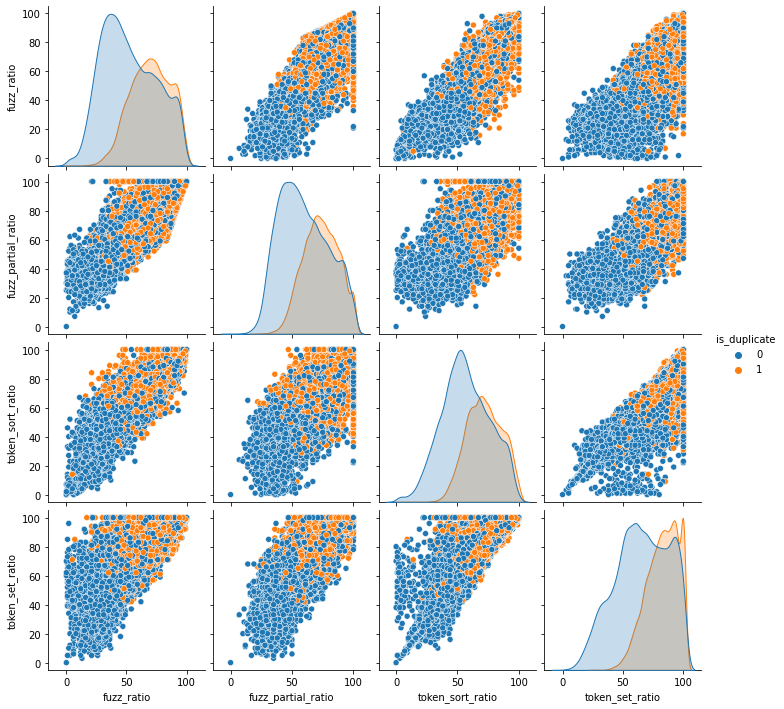

In [40]:
## lets see the similarity between the features

sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

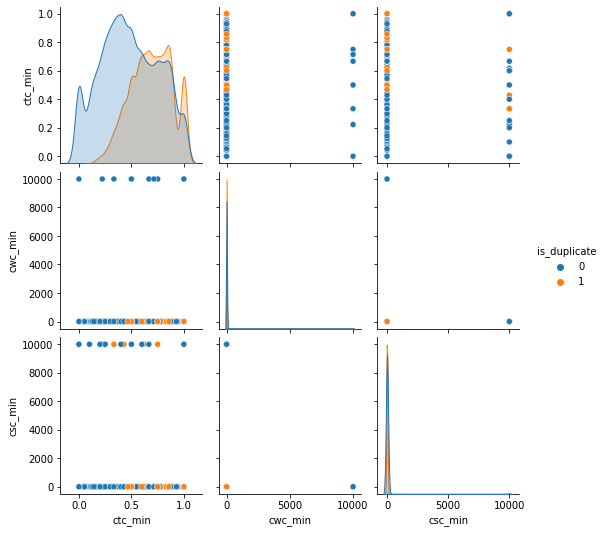

In [41]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')


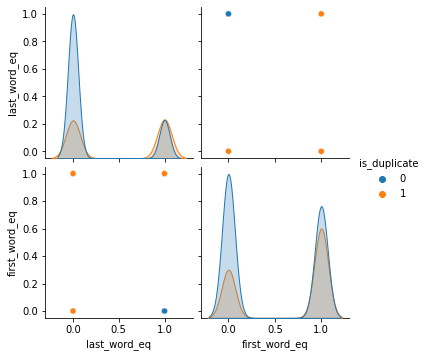

In [42]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


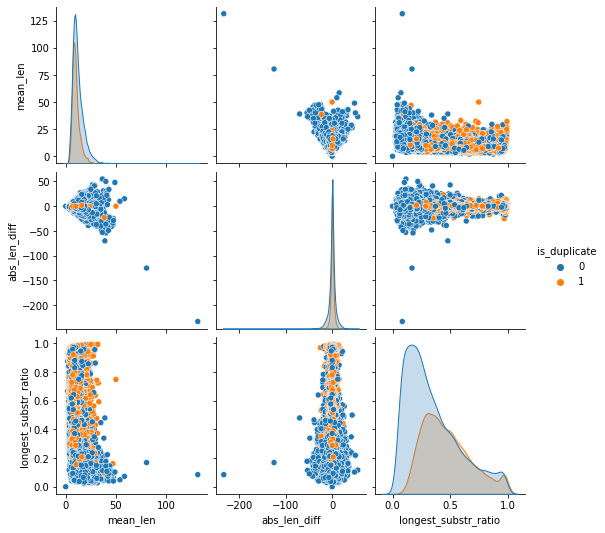

In [43]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')


## mean length and abs mean length is not providing any valuable information here

## using TSNE

lets reduce the data to lower dimesnions

In [44]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.466664,1.0,1.0,-3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0.000000,0.0,0.0,-17.0,21.5,0.050847,29,41,23,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1.0,0.0,-4.0,7.0,0.542857,55,70,48,69


In [114]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [115]:
from sklearn.manifold import TSNE

## TSNE same as PCA


tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=2,
    angle=0.5,
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.260s...
[t-SNE] Computed neighbors for 30000 samples in 6.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

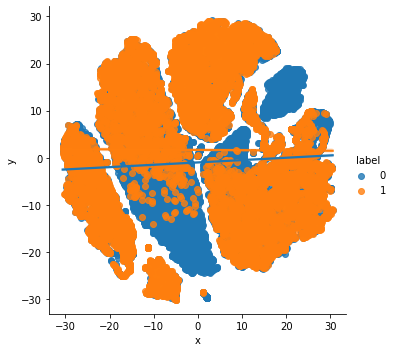

In [48]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})
sns.lmplot(data=x_df,x='x',y='y',hue='label')

In [ ]:
## if you wish to convert to 3 dimesnions
## then use the 3d library to see its distribution

In [116]:
## lets use the count vectorizer thing
from sklearn.feature_extraction.text import CountVectorizer

questions = list(new_df['question1']) + list(new_df['question2'])
## by this we got the bag of words

cv = CountVectorizer(max_features=3000,stop_words='english')
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [117]:
temp_df1 = pd.DataFrame(q1_arr, index = new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = new_df.index)

###########

## this step because there are same col names in the dataset
## and while doing the xg-boost thing,  error is coming for same names

q=[]
for i in temp_df2.columns:
    q.append(str(i)+"_")

temp_df2.columns = q
################################
temp_df = pd.concat([temp_df1,temp_df2],axis=1)

temp_df.shape

## 30,000 questions
## total features were 3000, so for 2 questions columns: total 6000 cols

(30000, 6000)

In [118]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990_,2991_,2992_,2993_,2994_,2995_,2996_,2997_,2998_,2999_
398782,1,75,76,13,13,13,26,0.50,0.124998,0.124998,...,0,0,0,0,0,0,0,0,0,0
115086,0,48,56,13,16,13,24,0.54,0.333322,0.249994,...,0,0,0,0,0,0,0,0,0,0
327711,0,104,119,28,21,17,38,0.45,0.111110,0.111110,...,0,0,0,0,0,0,0,0,0,0
367788,0,58,145,14,32,21,34,0.62,0.166664,0.083333,...,0,0,0,1,0,0,0,0,0,0
151235,0,34,49,5,9,8,13,0.62,0.249994,0.199996,...,0,0,0,0,0,0,0,0,0,0


## Random Forest

In [52]:
from sklearn.model_selection import train_test_split
X = final_df.drop('is_duplicate',axis=1)
y = final_df['is_duplicate']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,)


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)


0.78

In [119]:
## pickle dump

import pickle

Rf_advanced_feature_selection = 'Rf_advanced_feature_selection.sav'
pickle.dump(rf, open(Rf_advanced_feature_selection, 'wb'))


## loading the model
loaded_model = pickle.load(open(Rf_advanced_feature_selection, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.78


In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)


c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7831666666666667

In [120]:
## pickle dump

import pickle

xgb_advanced_feature_selection = 'xgb_advanced_feature_selection.sav'
pickle.dump(xgb, open(xgb_advanced_feature_selection, 'wb'))


## loading the model
loaded_model = pickle.load(open(xgb_advanced_feature_selection, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7831666666666667


In [ ]:
## though xgbooost is giving the goood accuracy
## but lets just look at the confusion matrix score

## need to look at when the question is not duplicate but its predicting as duplicates
## so less False negative one we will choose



In [57]:
from sklearn.metrics import confusion_matrix

## for xgb
confusion_matrix(y_test,y_pred)

## here False negative is 589 for xbg

array([[3223,  589],
       [ 712, 1476]], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix

## for rf
confusion_matrix(y_test,y_pred_rf)

## false negative is 516
## so definitely less false negative

## so choose rf as the model

array([[3281,  531],
       [ 789, 1399]], dtype=int64)

## Cross Validation Score

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv = 3)
np.average(scores)

0.7755000000000001

## Using Grid Search CV

In [60]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

from sklearn.model_selection import GridSearchCV

cv_rf = GridSearchCV(estimator = rf,param_grid = param_grid,cv=3)
cv_rf.fit(X_train, y_train)

cv_rf.best_params_

KeyboardInterrupt: 

## Lets do the same on the test dataset

In [121]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 and w2)

In [122]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [123]:
import nltk
from nltk.corpus import stopwords

def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words('english')
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [124]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [125]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [126]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    

## use this cv which was trained earlier, not the new one

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [127]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

rf.predict(query_point_creator(q1,q4))

array([1], dtype=int64)

In [128]:
cv

CountVectorizer(max_features=3000, stop_words='english')

In [129]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))